In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Pizza_Sale.csv')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1-1-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1-1-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1-1-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1-1-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1-1-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')  # Convert to datetime
df.set_index('order_date', inplace=True)  # Set 'order_date' as the index

# Group by 'order_date' and sum the 'quantity'
daily_sales = df.groupby('order_date')['quantity'].sum()

# Display the result
print(daily_sales)


order_date
2015-01-01    162
2015-01-02    165
2015-01-03    158
2015-01-04    106
2015-01-05    125
             ... 
2015-12-27     89
2015-12-28    102
2015-12-29     80
2015-12-30     82
2015-12-31    178
Name: quantity, Length: 358, dtype: int64


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(daily_sales, autolag='AIC')

#Checking the results:

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

1)ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


#spliting the data into train and test
size=int(len(daily_sales)*0.8)
train,test=daily_sales[0:size],daily_sales[size:len(daily_sales)]

ARIMA(0, 0, 0) - MAPE: 16.6319%
ARIMA(0, 0, 1) - MAPE: 16.6324%
ARIMA(0, 0, 2) - MAPE: 16.6176%
ARIMA(0, 0, 3) - MAPE: 16.3470%
ARIMA(0, 0, 4) - MAPE: 16.2444%
ARIMA(0, 0, 5) - MAPE: 16.8788%
ARIMA(0, 1, 0) - MAPE: 16.9553%
ARIMA(0, 1, 1) - MAPE: 16.6322%
ARIMA(0, 1, 2) - MAPE: 16.6328%
ARIMA(0, 1, 3) - MAPE: 16.6179%
ARIMA(0, 1, 4) - MAPE: 16.3587%
ARIMA(0, 1, 5) - MAPE: 16.2480%
ARIMA(0, 2, 0) - MAPE: 365.7744%
ARIMA(0, 2, 1) - MAPE: 15.9888%
ARIMA(0, 2, 2) - MAPE: 16.7322%
ARIMA(0, 2, 3) - MAPE: 16.7354%
ARIMA(0, 2, 4) - MAPE: 16.7060%
ARIMA(0, 2, 5) - MAPE: 16.3702%
ARIMA(1, 0, 0) - MAPE: 16.6322%
ARIMA(1, 0, 1) - MAPE: 16.5419%
ARIMA(1, 0, 2) - MAPE: 16.5745%
ARIMA(1, 0, 3) - MAPE: 16.2280%
ARIMA(1, 0, 4) - MAPE: 16.2247%
ARIMA(1, 0, 5) - MAPE: 17.0605%
ARIMA(1, 1, 0) - MAPE: 18.1788%
ARIMA(1, 1, 1) - MAPE: 16.6327%
ARIMA(1, 1, 2) - MAPE: 16.8011%
ARIMA(1, 1, 3) - MAPE: 16.5991%
ARIMA(1, 1, 4) - MAPE: 16.8004%
ARIMA(1, 1, 5) - MAPE: 16.5795%
ARIMA(1, 2, 0) - MAPE: 1439.5140%
ARIMA

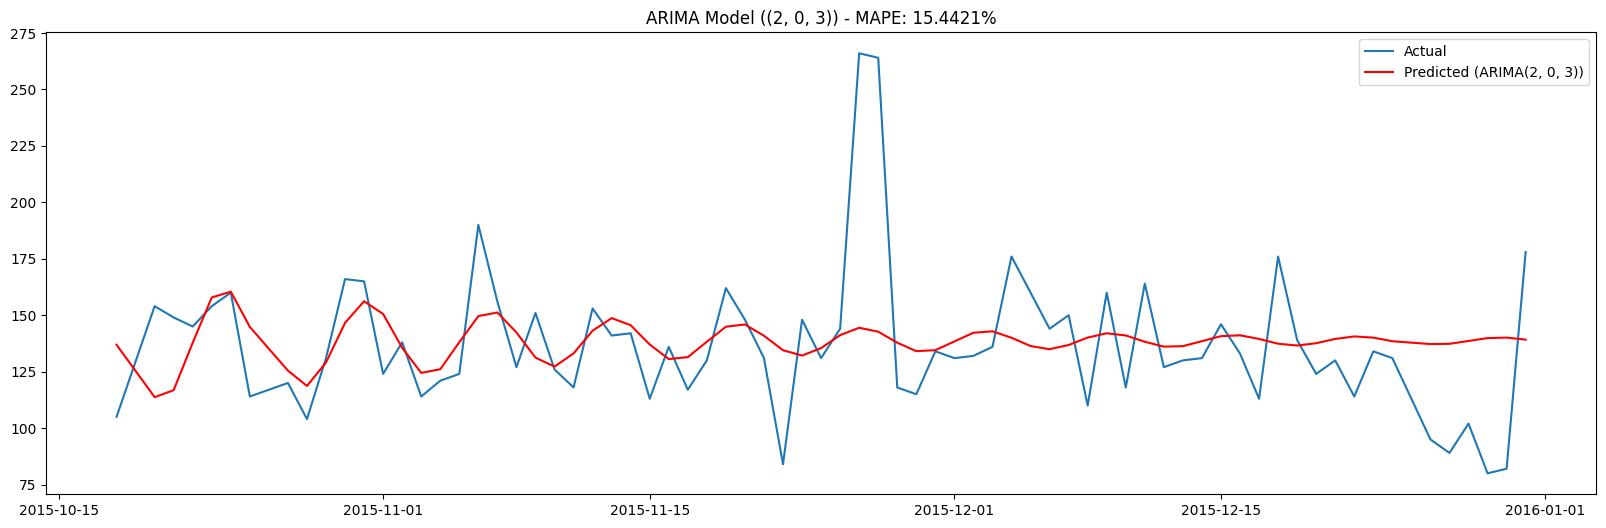

In [15]:
import warnings 
warnings.filterwarnings("ignore")

def tune_arima_model(train, test, p_values, d_values, q_values):
    best_mape, best_params = float("inf"), None
    best_model = None
    
    # Iterate through all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                # Fit ARIMA model
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                
                # Generate forecast on the test set
                forecast = model_fit.forecast(steps=len(test))
                
                # Calculate MAPE
                mape = mean_absolute_percentage_error(test, forecast)
                
                # Update the best model if this one has a lower MAPE
                if mape < best_mape:
                    best_mape = mape
                    best_params = (p, d, q)
                    best_model = model_fit
                
                print(f"ARIMA({p}, {d}, {q}) - MAPE: {mape*100:.4f}%")

    print(f"\nBest ARIMA Model: ARIMA{best_params} - MAPE: {best_mape*100:.4f}%")
    return best_model, best_params, best_mape



# Define possible values for p, d, q
p_values = range(0, 6)  # p: AR term
d_values = range(0, 3)  # d: differencing term
q_values = range(0, 6)  # q: MA term

# Tune the ARIMA model
best_model, best_params, best_mape = tune_arima_model(train, test, p_values, d_values, q_values)

# Plot the predictions of the best model
forecast = best_model.forecast(steps=len(test))
plt.figure(figsize=(20, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label=f'Predicted (ARIMA{best_params})', color='red')
plt.legend()
plt.title(f"ARIMA Model ({best_params}) - MAPE: {best_mape*100:.4f}%")
plt.show()

   

2)Prophet Model

In [10]:
#making the df ready for prophet as it requires df with ds and y
pizza_df=df.groupby('order_date')['quantity'].sum().reset_index()
pizza_df['order_date'] = pd.to_datetime(pizza_df['order_date'],format='%d-%m-%Y').dt.strftime('%Y-%m-%d')#changing the format of date
pizza_df.columns = ['ds', 'y']#renaming the columns
pizza_df

,ds,y
0,2015-01-01,162
1,2015-01-02,165
2,2015-01-03,158
3,2015-01-04,106
4,2015-01-05,125
...,...,...
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82


In [11]:
from prophet import Prophet
import numpy as np
m = Prophet()
m.fit(pizza_df)
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
historical_data = forecast[forecast['ds'] <= pizza_df['ds'].max()]  # Filter historical predictions
actual_values = pizza_df['y']
predicted_values = historical_data['yhat']

# Calculate MAPE
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) 

# Print MAPE
print(f'MAPE for the Prophet model: {mape*100:.4f}%')



22:50:23 - cmdstanpy - INFO - Chain [1] start processing
22:50:23 - cmdstanpy - INFO - Chain [1] done processing


            ds        yhat  yhat_lower  yhat_upper
0   2015-01-01  143.912294  118.525897  169.532752
1   2015-01-02  164.936645  137.398580  189.833295
2   2015-01-03  144.197993  118.812296  170.424009
3   2015-01-04  116.161308   91.369084  143.140533
4   2015-01-05  135.201172  110.678215  160.228552
..         ...         ...         ...         ...
360 2016-01-03  115.879790   90.380678  142.835877
361 2016-01-04  134.918946  108.141215  162.577975
362 2016-01-05  132.416507  106.317900  158.987747
363 2016-01-06  133.396781  107.018199  160.166169
364 2016-01-07  143.623664  118.053701  168.804679

[365 rows x 4 columns]
MAPE for the Prophet model: 10.0074%


In [19]:
next_week=predicted_values.tail(7)
next_week

351    143.642137
352    143.926420
353    115.889026
354    134.928182
355    132.425743
356    133.406017
357    143.632900
Name: yhat, dtype: float64

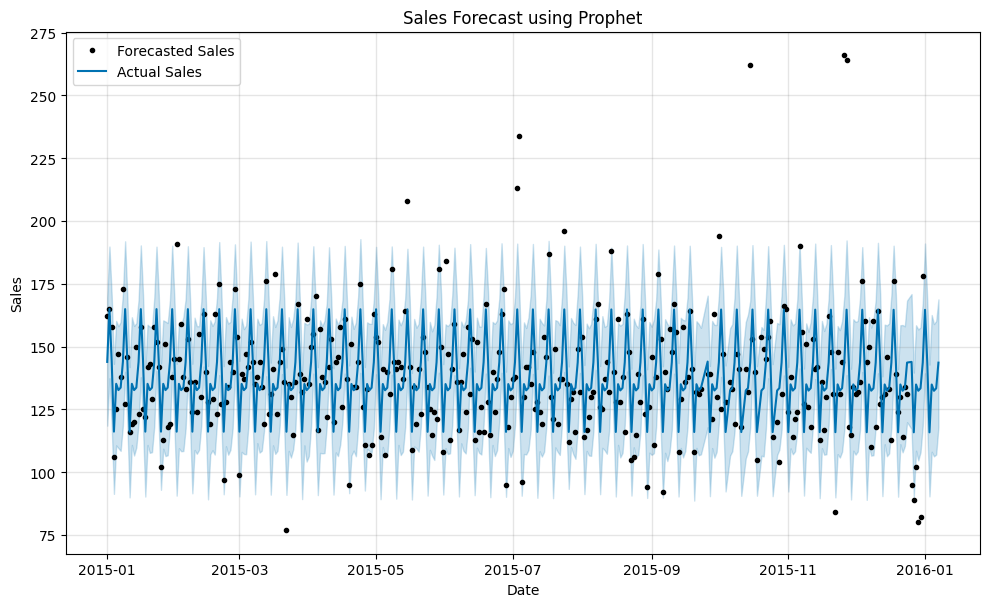

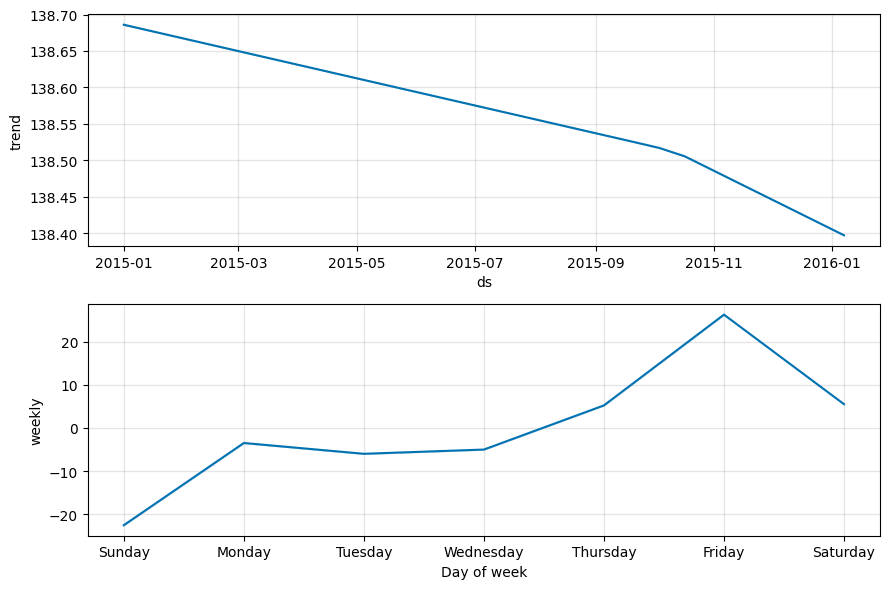

In [15]:
# Plot the forecast
fig = m.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['Forecasted Sales', 'Actual Sales'])
plt.show()

# Plot the forecast components
fig2 = m.plot_components(forecast)
plt.show()


In [ ]:
# Plot the forecast
fig = m.plot(forecast)
plt.plot(pizza_df['ds'], pizza_df['y'], 'k.', label='Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with Actual Sales Data')
plt.legend(['Forecasted Sales', 'Actual Sales'])
plt.show()

# Plot the forecast components
fig2 = m.plot_components(forecast)
plt.show()


ConversionError: Failed to convert value(s) to axis units: array(['2015-01-01T00:00:00.000000000', '2015-01-02T00:00:00.000000000',
       '2015-01-03T00:00:00.000000000', '2015-01-04T00:00:00.000000000',
       '2015-01-05T00:00:00.000000000', '2015-01-06T00:00:00.000000000',
       '2015-01-07T00:00:00.000000000', '2015-01-08T00:00:00.000000000',
       '2015-01-09T00:00:00.000000000', '2015-01-10T00:00:00.000000000',
       '2015-01-11T00:00:00.000000000', '2015-01-12T00:00:00.000000000',
       '2015-01-13T00:00:00.000000000', '2015-01-14T00:00:00.000000000',
       '2015-01-15T00:00:00.000000000', '2015-01-16T00:00:00.000000000',
       '2015-01-17T00:00:00.000000000', '2015-01-18T00:00:00.000000000',
       '2015-01-19T00:00:00.000000000', '2015-01-20T00:00:00.000000000',
       '2015-01-21T00:00:00.000000000', '2015-01-22T00:00:00.000000000',
       '2015-01-23T00:00:00.000000000', '2015-01-24T00:00:00.000000000',
       '2015-01-25T00:00:00.000000000', '2015-01-26T00:00:00.000000000',
       '2015-01-27T00:00:00.000000000', '2015-01-28T00:00:00.000000000',
       '2015-01-29T00:00:00.000000000', '2015-01-30T00:00:00.000000000',
       '2015-01-31T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-02-02T00:00:00.000000000', '2015-02-03T00:00:00.000000000',
       '2015-02-04T00:00:00.000000000', '2015-02-05T00:00:00.000000000',
       '2015-02-06T00:00:00.000000000', '2015-02-07T00:00:00.000000000',
       '2015-02-08T00:00:00.000000000', '2015-02-09T00:00:00.000000000',
       '2015-02-10T00:00:00.000000000', '2015-02-11T00:00:00.000000000',
       '2015-02-12T00:00:00.000000000', '2015-02-13T00:00:00.000000000',
       '2015-02-14T00:00:00.000000000', '2015-02-15T00:00:00.000000000',
       '2015-02-16T00:00:00.000000000', '2015-02-17T00:00:00.000000000',
       '2015-02-18T00:00:00.000000000', '2015-02-19T00:00:00.000000000',
       '2015-02-20T00:00:00.000000000', '2015-02-21T00:00:00.000000000',
       '2015-02-22T00:00:00.000000000', '2015-02-23T00:00:00.000000000',
       '2015-02-24T00:00:00.000000000', '2015-02-25T00:00:00.000000000',
       '2015-02-26T00:00:00.000000000', '2015-02-27T00:00:00.000000000',
       '2015-02-28T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2015-03-02T00:00:00.000000000', '2015-03-03T00:00:00.000000000',
       '2015-03-04T00:00:00.000000000', '2015-03-05T00:00:00.000000000',
       '2015-03-06T00:00:00.000000000', '2015-03-07T00:00:00.000000000',
       '2015-03-08T00:00:00.000000000', '2015-03-09T00:00:00.000000000',
       '2015-03-10T00:00:00.000000000', '2015-03-11T00:00:00.000000000',
       '2015-03-12T00:00:00.000000000', '2015-03-13T00:00:00.000000000',
       '2015-03-14T00:00:00.000000000', '2015-03-15T00:00:00.000000000',
       '2015-03-16T00:00:00.000000000', '2015-03-17T00:00:00.000000000',
       '2015-03-18T00:00:00.000000000', '2015-03-19T00:00:00.000000000',
       '2015-03-20T00:00:00.000000000', '2015-03-21T00:00:00.000000000',
       '2015-03-22T00:00:00.000000000', '2015-03-23T00:00:00.000000000',
       '2015-03-24T00:00:00.000000000', '2015-03-25T00:00:00.000000000',
       '2015-03-26T00:00:00.000000000', '2015-03-27T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-03-29T00:00:00.000000000',
       '2015-03-30T00:00:00.000000000', '2015-03-31T00:00:00.000000000',
       '2015-04-01T00:00:00.000000000', '2015-04-02T00:00:00.000000000',
       '2015-04-03T00:00:00.000000000', '2015-04-04T00:00:00.000000000',
       '2015-04-05T00:00:00.000000000', '2015-04-06T00:00:00.000000000',
       '2015-04-07T00:00:00.000000000', '2015-04-08T00:00:00.000000000',
       '2015-04-09T00:00:00.000000000', '2015-04-10T00:00:00.000000000',
       '2015-04-11T00:00:00.000000000', '2015-04-12T00:00:00.000000000',
       '2015-04-13T00:00:00.000000000', '2015-04-14T00:00:00.000000000',
       '2015-04-15T00:00:00.000000000', '2015-04-16T00:00:00.000000000',
       '2015-04-17T00:00:00.000000000', '2015-04-18T00:00:00.000000000',
       '2015-04-19T00:00:00.000000000', '2015-04-20T00:00:00.000000000',
       '2015-04-21T00:00:00.000000000', '2015-04-22T00:00:00.000000000',
       '2015-04-23T00:00:00.000000000', '2015-04-24T00:00:00.000000000',
       '2015-04-25T00:00:00.000000000', '2015-04-26T00:00:00.000000000',
       '2015-04-27T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-04-29T00:00:00.000000000', '2015-04-30T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-05-02T00:00:00.000000000',
       '2015-05-03T00:00:00.000000000', '2015-05-04T00:00:00.000000000',
       '2015-05-05T00:00:00.000000000', '2015-05-06T00:00:00.000000000',
       '2015-05-07T00:00:00.000000000', '2015-05-08T00:00:00.000000000',
       '2015-05-09T00:00:00.000000000', '2015-05-10T00:00:00.000000000',
       '2015-05-11T00:00:00.000000000', '2015-05-12T00:00:00.000000000',
       '2015-05-13T00:00:00.000000000', '2015-05-14T00:00:00.000000000',
       '2015-05-15T00:00:00.000000000', '2015-05-16T00:00:00.000000000',
       '2015-05-17T00:00:00.000000000', '2015-05-18T00:00:00.000000000',
       '2015-05-19T00:00:00.000000000', '2015-05-20T00:00:00.000000000',
       '2015-05-21T00:00:00.000000000', '2015-05-22T00:00:00.000000000',
       '2015-05-23T00:00:00.000000000', '2015-05-24T00:00:00.000000000',
       '2015-05-25T00:00:00.000000000', '2015-05-26T00:00:00.000000000',
       '2015-05-27T00:00:00.000000000', '2015-05-28T00:00:00.000000000',
       '2015-05-29T00:00:00.000000000', '2015-05-30T00:00:00.000000000',
       '2015-05-31T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-06-02T00:00:00.000000000', '2015-06-03T00:00:00.000000000',
       '2015-06-04T00:00:00.000000000', '2015-06-05T00:00:00.000000000',
       '2015-06-06T00:00:00.000000000', '2015-06-07T00:00:00.000000000',
       '2015-06-08T00:00:00.000000000', '2015-06-09T00:00:00.000000000',
       '2015-06-10T00:00:00.000000000', '2015-06-11T00:00:00.000000000',
       '2015-06-12T00:00:00.000000000', '2015-06-13T00:00:00.000000000',
       '2015-06-14T00:00:00.000000000', '2015-06-15T00:00:00.000000000',
       '2015-06-16T00:00:00.000000000', '2015-06-17T00:00:00.000000000',
       '2015-06-18T00:00:00.000000000', '2015-06-19T00:00:00.000000000',
       '2015-06-20T00:00:00.000000000', '2015-06-21T00:00:00.000000000',
       '2015-06-22T00:00:00.000000000', '2015-06-23T00:00:00.000000000',
       '2015-06-24T00:00:00.000000000', '2015-06-25T00:00:00.000000000',
       '2015-06-26T00:00:00.000000000', '2015-06-27T00:00:00.000000000',
       '2015-06-28T00:00:00.000000000', '2015-06-29T00:00:00.000000000',
       '2015-06-30T00:00:00.000000000', '2015-07-01T00:00:00.000000000',
       '2015-07-02T00:00:00.000000000', '2015-07-03T00:00:00.000000000',
       '2015-07-04T00:00:00.000000000', '2015-07-05T00:00:00.000000000',
       '2015-07-06T00:00:00.000000000', '2015-07-07T00:00:00.000000000',
       '2015-07-08T00:00:00.000000000', '2015-07-09T00:00:00.000000000',
       '2015-07-10T00:00:00.000000000', '2015-07-11T00:00:00.000000000',
       '2015-07-12T00:00:00.000000000', '2015-07-13T00:00:00.000000000',
       '2015-07-14T00:00:00.000000000', '2015-07-15T00:00:00.000000000',
       '2015-07-16T00:00:00.000000000', '2015-07-17T00:00:00.000000000',
       '2015-07-18T00:00:00.000000000', '2015-07-19T00:00:00.000000000',
       '2015-07-20T00:00:00.000000000', '2015-07-21T00:00:00.000000000',
       '2015-07-22T00:00:00.000000000', '2015-07-23T00:00:00.000000000',
       '2015-07-24T00:00:00.000000000', '2015-07-25T00:00:00.000000000',
       '2015-07-26T00:00:00.000000000', '2015-07-27T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-07-29T00:00:00.000000000',
       '2015-07-30T00:00:00.000000000', '2015-07-31T00:00:00.000000000',
       '2015-08-01T00:00:00.000000000', '2015-08-02T00:00:00.000000000',
       '2015-08-03T00:00:00.000000000', '2015-08-04T00:00:00.000000000',
       '2015-08-05T00:00:00.000000000', '2015-08-06T00:00:00.000000000',
       '2015-08-07T00:00:00.000000000', '2015-08-08T00:00:00.000000000',
       '2015-08-09T00:00:00.000000000', '2015-08-10T00:00:00.000000000',
       '2015-08-11T00:00:00.000000000', '2015-08-12T00:00:00.000000000',
       '2015-08-13T00:00:00.000000000', '2015-08-14T00:00:00.000000000',
       '2015-08-15T00:00:00.000000000', '2015-08-16T00:00:00.000000000',
       '2015-08-17T00:00:00.000000000', '2015-08-18T00:00:00.000000000',
       '2015-08-19T00:00:00.000000000', '2015-08-20T00:00:00.000000000',
       '2015-08-21T00:00:00.000000000', '2015-08-22T00:00:00.000000000',
       '2015-08-23T00:00:00.000000000', '2015-08-24T00:00:00.000000000',
       '2015-08-25T00:00:00.000000000', '2015-08-26T00:00:00.000000000',
       '2015-08-27T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-08-29T00:00:00.000000000', '2015-08-30T00:00:00.000000000',
       '2015-08-31T00:00:00.000000000', '2015-09-01T00:00:00.000000000',
       '2015-09-02T00:00:00.000000000', '2015-09-03T00:00:00.000000000',
       '2015-09-04T00:00:00.000000000', '2015-09-05T00:00:00.000000000',
       '2015-09-06T00:00:00.000000000', '2015-09-07T00:00:00.000000000',
       '2015-09-08T00:00:00.000000000', '2015-09-09T00:00:00.000000000',
       '2015-09-10T00:00:00.000000000', '2015-09-11T00:00:00.000000000',
       '2015-09-12T00:00:00.000000000', '2015-09-13T00:00:00.000000000',
       '2015-09-14T00:00:00.000000000', '2015-09-15T00:00:00.000000000',
       '2015-09-16T00:00:00.000000000', '2015-09-17T00:00:00.000000000',
       '2015-09-18T00:00:00.000000000', '2015-09-19T00:00:00.000000000',
       '2015-09-20T00:00:00.000000000', '2015-09-21T00:00:00.000000000',
       '2015-09-22T00:00:00.000000000', '2015-09-23T00:00:00.000000000',
       '2015-09-26T00:00:00.000000000', '2015-09-27T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-09-29T00:00:00.000000000',
       '2015-09-30T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-10-02T00:00:00.000000000', '2015-10-03T00:00:00.000000000',
       '2015-10-04T00:00:00.000000000', '2015-10-06T00:00:00.000000000',
       '2015-10-07T00:00:00.000000000', '2015-10-08T00:00:00.000000000',
       '2015-10-09T00:00:00.000000000', '2015-10-10T00:00:00.000000000',
       '2015-10-11T00:00:00.000000000', '2015-10-13T00:00:00.000000000',
       '2015-10-14T00:00:00.000000000', '2015-10-15T00:00:00.000000000',
       '2015-10-16T00:00:00.000000000', '2015-10-17T00:00:00.000000000',
       '2015-10-18T00:00:00.000000000', '2015-10-20T00:00:00.000000000',
       '2015-10-21T00:00:00.000000000', '2015-10-22T00:00:00.000000000',
       '2015-10-23T00:00:00.000000000', '2015-10-24T00:00:00.000000000',
       '2015-10-25T00:00:00.000000000', '2015-10-27T00:00:00.000000000',
       '2015-10-28T00:00:00.000000000', '2015-10-29T00:00:00.000000000',
       '2015-10-30T00:00:00.000000000', '2015-10-31T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-11-02T00:00:00.000000000',
       '2015-11-03T00:00:00.000000000', '2015-11-04T00:00:00.000000000',
       '2015-11-05T00:00:00.000000000', '2015-11-06T00:00:00.000000000',
       '2015-11-07T00:00:00.000000000', '2015-11-08T00:00:00.000000000',
       '2015-11-09T00:00:00.000000000', '2015-11-10T00:00:00.000000000',
       '2015-11-11T00:00:00.000000000', '2015-11-12T00:00:00.000000000',
       '2015-11-13T00:00:00.000000000', '2015-11-14T00:00:00.000000000',
       '2015-11-15T00:00:00.000000000', '2015-11-16T00:00:00.000000000',
       '2015-11-17T00:00:00.000000000', '2015-11-18T00:00:00.000000000',
       '2015-11-19T00:00:00.000000000', '2015-11-20T00:00:00.000000000',
       '2015-11-21T00:00:00.000000000', '2015-11-22T00:00:00.000000000',
       '2015-11-23T00:00:00.000000000', '2015-11-24T00:00:00.000000000',
       '2015-11-25T00:00:00.000000000', '2015-11-26T00:00:00.000000000',
       '2015-11-27T00:00:00.000000000', '2015-11-28T00:00:00.000000000',
       '2015-11-29T00:00:00.000000000', '2015-11-30T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2015-12-02T00:00:00.000000000',
       '2015-12-03T00:00:00.000000000', '2015-12-04T00:00:00.000000000',
       '2015-12-05T00:00:00.000000000', '2015-12-06T00:00:00.000000000',
       '2015-12-07T00:00:00.000000000', '2015-12-08T00:00:00.000000000',
       '2015-12-09T00:00:00.000000000', '2015-12-10T00:00:00.000000000',
       '2015-12-11T00:00:00.000000000', '2015-12-12T00:00:00.000000000',
       '2015-12-13T00:00:00.000000000', '2015-12-14T00:00:00.000000000',
       '2015-12-15T00:00:00.000000000', '2015-12-16T00:00:00.000000000',
       '2015-12-17T00:00:00.000000000', '2015-12-18T00:00:00.000000000',
       '2015-12-19T00:00:00.000000000', '2015-12-20T00:00:00.000000000',
       '2015-12-21T00:00:00.000000000', '2015-12-22T00:00:00.000000000',
       '2015-12-23T00:00:00.000000000', '2015-12-24T00:00:00.000000000',
       '2015-12-26T00:00:00.000000000', '2015-12-27T00:00:00.000000000',
       '2015-12-28T00:00:00.000000000', '2015-12-29T00:00:00.000000000',
       '2015-12-30T00:00:00.000000000', '2015-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

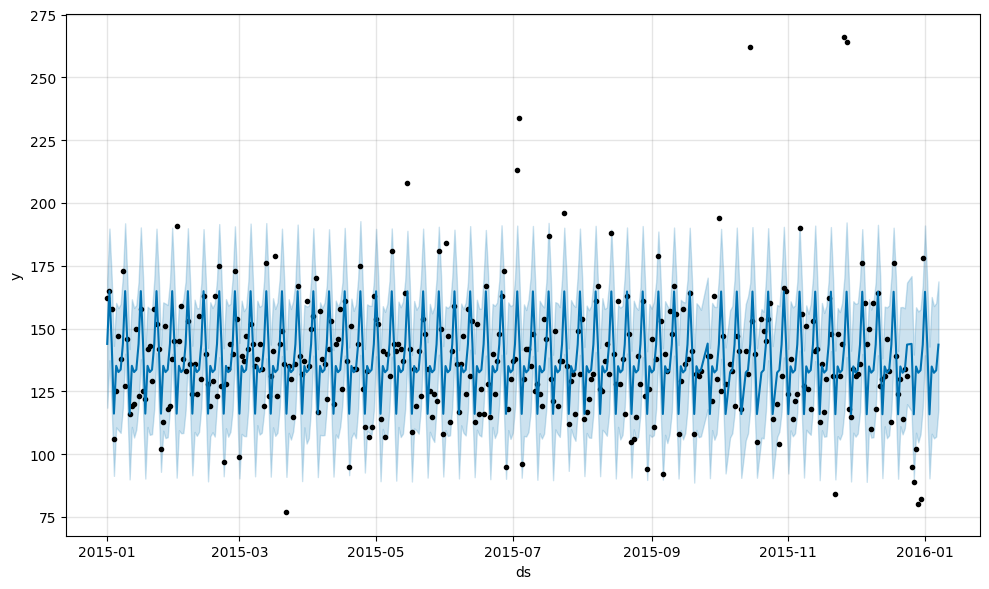

In [14]:
# Plot the forecast
fig = m.plot(forecast)
plt.plot(pizza_df['ds'], pizza_df['y'], 'k.', label='Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast with Actual Sales Data')
plt.legend(['Forecasted Sales', 'Actual Sales'])
plt.show()

# Plot the forecast components
fig2 = m.plot_components(forecast)
plt.show()


3)Linear Regression Model

In [29]:
pizza_df=df.groupby('order_date')['quantity'].sum().reset_index()

In [30]:
from sklearn.linear_model import LinearRegression
X = (pizza_df['order_date'] - pizza_df['order_date'].min()).dt.days.values.reshape(-1, 1)
y=pizza_df['quantity']
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=pizza_df.index)

mape = np.mean(np.abs((y - y_pred) / y)) 

# Print MAPE
print(f'MAPE for the linear regression model: {mape*100:.4f}%')


MAPE for the linear regression model: 12.6998%


In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error  # Import MAPE function

# Split the data into training and testing sets
size = int(len(daily_sales) * 0.8)
train, test = daily_sales[0:size], daily_sales[size:]

# Function to tune the SARIMA model
def tune_sarima_model(train, test, p_values, d_values, q_values, s_values):
    best_mape, best_params = float("inf"), None
    best_model = None
    
    # Iterate through all combinations of p, d, q, s
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for s in s_values:
                    try:
                        # Fit SARIMA model with seasonal_order=(p, d, q, s)
                        model = SARIMAX(train, order=(p, d, q), seasonal_order=(p, d, q, s))
                        model_fit = model.fit(disp=False)
                        
                        # Generate forecast on the test set
                        forecast = model_fit.forecast(steps=len(test))
                        
                        # Calculate MAPE (Mean Absolute Percentage Error)
                        mape = mean_absolute_percentage_error(test, forecast)
                        
                        # Update the best model if this one has a lower MAPE
                        if mape < best_mape:
                            best_mape = mape
                            best_params = (p, d, q, s)
                            best_model = model_fit
                        
                        print(f"SARIMA({p}, {d}, {q}, {s}) - MAPE: {mape:.4f}")

                    except Exception as e:
                        print(f"Error with SARIMA({p}, {d}, {q}, {s}): {e}")
                        continue

    print(f"\nBest SARIMA Model: SARIMA{best_params} - MAPE: {best_mape:.4f}")
    return best_model, best_params, best_mape

# Define possible values for p, d, q, and s (seasonal period)
p_values = range(0, 6)  # p: AR term
d_values = range(0, 3)  # d: differencing term
q_values = range(0, 6)  # q: MA term
s_values = [12]  # Assume monthly data with yearly seasonality, s=12 (monthly data)

# Tune the SARIMA model
best_model, best_params, best_mape = tune_sarima_model(train, test, p_values, d_values, q_values, s_values)


SARIMA(0, 0, 0, 12) - MAPE: 1.0000
SARIMA(0, 0, 1, 12) - MAPE: 0.9169
SARIMA(0, 0, 2, 12) - MAPE: 0.8613
SARIMA(0, 0, 3, 12) - MAPE: 0.7958
SARIMA(0, 0, 4, 12) - MAPE: 0.6894
SARIMA(0, 0, 5, 12) - MAPE: 0.7047
SARIMA(0, 1, 0, 12) - MAPE: 0.2865
SARIMA(0, 1, 1, 12) - MAPE: 0.1751
SARIMA(0, 1, 2, 12) - MAPE: 0.1736
SARIMA(0, 1, 3, 12) - MAPE: 0.1739
SARIMA(0, 1, 4, 12) - MAPE: 0.1750
SARIMA(0, 1, 5, 12) - MAPE: 0.1734
SARIMA(0, 2, 0, 12) - MAPE: 131.4022
SARIMA(0, 2, 1, 12) - MAPE: 0.5314
SARIMA(0, 2, 2, 12) - MAPE: 0.2176
SARIMA(0, 2, 3, 12) - MAPE: 0.2233
SARIMA(0, 2, 4, 12) - MAPE: 0.2233
SARIMA(0, 2, 5, 12) - MAPE: 0.2205
SARIMA(1, 0, 0, 12) - MAPE: 0.5116
SARIMA(1, 0, 1, 12) - MAPE: 0.1700
Error with SARIMA(1, 0, 2, 12): LU decomposition error.
SARIMA(1, 0, 3, 12) - MAPE: 0.1776
SARIMA(1, 0, 4, 12) - MAPE: 0.1766
SARIMA(1, 0, 5, 12) - MAPE: 0.1733
SARIMA(1, 1, 0, 12) - MAPE: 0.2283
SARIMA(1, 1, 1, 12) - MAPE: 0.1737
SARIMA(1, 1, 2, 12) - MAPE: 0.1736
SARIMA(1, 1, 3, 12) - MAPE: 0.17

5)LSTM MODEL

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error  # Import MAPE function

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe = read_excel('pizza.xlsx', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate MAPE for train and test
trainScore = mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
print(f'Train MAPE: {trainScore*100 :.2f}%')
testScore = mean_absolute_percentage_error(testY[0], testPredict[:,0])
print(f'Test MAPE: {testScore*100 :.2f}%')

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


Epoch 1/100
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
237/237 - 2s - 8ms/step - loss: 0.0585
Epoch 2/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 3/100
237/237 - 1s - 2ms/step - loss: 0.0129
Epoch 4/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 5/100
237/237 - 1s - 2ms/step - loss: 0.0130
Epoch 6/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 7/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 8/100
237/237 - 1s - 4ms/step - loss: 0.0130
Epoch 9/100
237/237 - 1s - 5ms/step - loss: 0.0130
Epoch 10/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 11/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 12/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 13/100
237/237 - 1s - 6ms/step - loss: 0.0130
Epoch 14/100
237/237 - 1s - 5ms/step - loss: 0.0130
Epoch 15/100
237/237 - 1s - 5ms/step - loss: 0.0130
Epoch 16/100
237/237 - 1s - 6ms/step - loss: 0.0130
Epoch 17/100
237/237 - 1s - 6ms/step - loss: 0.0130
Epoch 18/100
237/237 - 2s - 9ms/step - loss: 0.0130
Epoch 19/100
237/237 - 1s - 4ms/step - loss: 0.0130
Epoch 20/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 21/100
237/237 - 1s - 5ms/step - loss: 0.0130
Epoch 22/100
237/237 - 1s - 4ms/step - loss: 0.0130
Epoch 23/100
237/237 - 1s - 2ms/step - loss: 0.0130
Epoch 24/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 25/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 26/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 27/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 28/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 29/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 30/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 31/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 32/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 33/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 34/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 35/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 36/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 37/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 38/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 39/100
237/237 - 1s - 2ms/step - loss: 0.0130
Epoch 40/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 41/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 42/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 43/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 44/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 45/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 46/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 47/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 48/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 49/100
237/237 - 1s - 2ms/step - loss: 0.0130
Epoch 50/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 51/100
237/237 - 1s - 2ms/step - loss: 0.0130
Epoch 52/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 53/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 54/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 55/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 56/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 57/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 58/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 59/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 60/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 61/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 62/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 63/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 64/100
237/237 - 1s - 2ms/step - loss: 0.0130
Epoch 65/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 66/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 67/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 68/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 69/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 70/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 71/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 72/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 73/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 74/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 75/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 76/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 77/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 78/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 79/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 80/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 81/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 82/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 83/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 84/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 85/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 86/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 87/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 88/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 89/100
237/237 - 0s - 2ms/step - loss: 0.0130
Epoch 90/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 91/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 92/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 93/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 94/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 95/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 96/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 97/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 98/100
237/237 - 0s - 1ms/step - loss: 0.0130
Epoch 99/100
237/237 - 1s - 3ms/step - loss: 0.0130
Epoch 100/100
237/237 - 1s - 2ms/step - loss: 0.0130
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train MAPE: 11.99%
Test MAPE: 14.93%


Model Evaluation

In [72]:
model_evaluation={
    'Models':['Arima','Prophet','LSTM','Sarima','Regression'],
    'MAPE%' :['15.44','10.007','14.93','16.18','12.69']
}

Mape_df=pd.DataFrame(model_evaluation)
Mape_df

,Models,MAPE%
0,Arima,15.44
1,Prophet,10.007
2,LSTM,14.93
3,Sarima,16.18
4,Regression,12.69


In [ ]:
#preparing the df to forecast for each type of pizza
daily_df = df.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()
daily_df.set_index('order_date', inplace=True)

In [33]:
daily_df

,pizza_name_id,quantity
order_date,,
2015-01-01,bbq_ckn_l,6
2015-01-01,bbq_ckn_m,4
2015-01-01,bbq_ckn_s,1
2015-01-01,big_meat_s,5
2015-01-01,calabrese_m,1
...,...,...
2015-12-31,the_greek_l,1
2015-12-31,the_greek_xl,1
2015-12-31,veggie_veg_l,4


In [34]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

# Assuming your 'daily_df' is already set up with the correct format:
# daily_df = df.groupby(['order_date', 'pizza_name'])['quantity'].sum().reset_index()
# daily_df['order_date'] = pd.to_datetime(daily_df['order_date'])
# daily_df.set_index('order_date', inplace=True)

# Get the list of unique pizza names
pizza_name_ids = daily_df['pizza_name_id'].unique()

# Create a list to store forecast results
forecast_results = []

# Function to fit ARIMA and forecast for each pizza
def forecast_pizza_sales(pizza_name_id, daily_df, forecast_periods=7):
    # Filter the data for the specific pizza type
    pizza_data = daily_df[daily_df['pizza_name_id'] == pizza_name_id]['quantity']
    
    # Fit the ARIMA model (adjust p, d, q based on your data and ACF/PACF analysis)
    model = ARIMA(pizza_data, order=(2,0,3))  # (p, d, q) are ARIMA parameters, adjust as needed
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=forecast_periods)
    
    # Create a future date range
    forecast_index = pd.date_range(start=pizza_data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')
    
    # Add forecast results to the list
    forecast_df = pd.DataFrame({
        'pizza_name_id': pizza_name_id,
        'forecast_date': forecast_index,
        'forecast_quantity': forecast
    })
    
    # Append the forecast data to the results list
    forecast_results.append(forecast_df)
    
    # # Optional: Plot the historical and forecasted values
    # plt.figure(figsize=(10, 6))
    # plt.plot(pizza_data.index, pizza_data, label='Historical Data')
    # plt.plot(forecast_index, forecast, label='Forecast', color='red')
    # plt.title(f'Forecast for {pizza_name}')
    # plt.legend()
    # plt.show()

# Loop over each pizza and forecast
for pizza in pizza_name_ids:
    forecast_pizza_sales(pizza, daily_df)

# Combine all forecast results into a single DataFrame
forecast_df = pd.concat(forecast_results, ignore_index=True)

# Display the forecast DataFrame
print(forecast_df)


     pizza_name_id forecast_date  forecast_quantity
0        bbq_ckn_l    2016-01-01           3.349596
1        bbq_ckn_l    2016-01-02           3.203660
2        bbq_ckn_l    2016-01-03           3.128194
3        bbq_ckn_l    2016-01-04           3.117632
4        bbq_ckn_l    2016-01-05           3.085329
..             ...           ...                ...
632  the_greek_xxl    2015-12-23           0.999995
633  the_greek_xxl    2015-12-24           0.999995
634  the_greek_xxl    2015-12-25           0.999995
635  the_greek_xxl    2015-12-26           0.999995
636  the_greek_xxl    2015-12-27           0.999995

[637 rows x 3 columns]


In [35]:
forecast_df['forecast_quantity'] = forecast_df['forecast_quantity'].round(0).astype(int)

In [ ]:
forecast_df= forecast_df.loc[:, ~forecast_df_combined.columns.duplicated()]

# Set 'forecast_date' as the index for easy viewing
forecast_df_combined.set_index('forecast_date', inplace=True)

# Display the forecasted DataFrame in pivot format
print(forecast_df_combined)

In [46]:
pivot_df.columns=['pizza_name','forecasted_quantity']

In [58]:
pizza_ingredients_df=pd.read_excel('Pizza_ingredients.xlsx')
pizza_ingredients_df

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [59]:
mean_value=pizza_ingredients_df['Items_Qty_In_Grams'].mean()
pizza_ingredients_df['Items_Qty_In_Grams'].fillna(mean_value,inplace=True)

In [67]:
pizza_ingredients_df.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    0
dtype: int64

In [69]:
import pandas as pd


# Initialize a dictionary to store the total ingredient quantities required
ingredient_quantities = {}

# Step 1: Iterate over each unique pizza_name_id in the forecast
for pizza_name_id in forecast_df['pizza_name_id'].unique():
    # Step 2: Get the total predicted quantity for this pizza (sum across all forecast dates)
    predicted_quantity = forecast_df[forecast_df['pizza_name_id'] == pizza_name_id]['forecast_quantity'].sum()
    
    # Step 3: Get the ingredients for this pizza from the pizza_ingredients_df
    pizza_ingredients = pizza_ingredients_df[pizza_ingredients_df['pizza_name_id'] == pizza_name_id]
    
    # Step 4: For each ingredient, calculate the required quantity and aggregate
    for index, row in pizza_ingredients.iterrows():
        ingredient = row['pizza_ingredients']
        ingredient_qty = row['Items_Qty_In_Grams']
        
        # Calculate the required ingredient quantity
        required_quantity = predicted_quantity * ingredient_qty
        
        # Add to the total ingredient quantity (accumulate)
        if ingredient not in ingredient_quantities:
            ingredient_quantities[ingredient] = 0
        ingredient_quantities[ingredient] += required_quantity

# Convert the dictionary to a DataFrame for easier viewing
ingredient_quantities_df = pd.DataFrame(list(ingredient_quantities.items()), columns=['ingredient', 'total_required_grams'])

# Display the result
print(ingredient_quantities_df)


            ingredient  total_required_grams
0    Barbecued Chicken           1750.000000
1          Red Peppers           4540.000000
2        Green Peppers           2475.000000
3             Tomatoes          15610.000000
4           Red Onions          23140.000000
..                 ...                   ...
59   Brie Carre Cheese            420.000000
60          Prosciutto            420.000000
61  Caramelized Onions            427.898833
62               Pears            140.000000
63               Thyme             70.000000

[64 rows x 2 columns]


In [35]:
pizza_df=df[['order_date','quantity','pizza_name_id']]
pizza_df

,order_date,quantity,pizza_name_id
0,1-1-2015,1,hawaiian_m
1,1-1-2015,1,classic_dlx_m
2,1-1-2015,1,five_cheese_l
3,1-1-2015,1,ital_supr_l
4,1-1-2015,1,mexicana_m
...,...,...,...
48615,31-12-2015,1,ckn_alfredo_m
48616,31-12-2015,1,four_cheese_l
48617,31-12-2015,1,napolitana_s
48618,31-12-2015,1,mexicana_l


In [48]:
pizza_df = df.groupby(['order_date', 'pizza_name_id'])['quantity'].sum().reset_index()
pizza_df['order_date']=pd.to_datetime(pizza_df['order_date'],format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
pizza_df.columns=['ds','pizza_name_id','y']
pizza_df

,ds,pizza_name_id,y
0,2015-01-01,bbq_ckn_l,6
1,2015-01-01,bbq_ckn_m,4
2,2015-01-01,bbq_ckn_s,1
3,2015-01-01,big_meat_s,5
4,2015-01-01,calabrese_m,1
...,...,...,...
22955,2015-09-09,the_greek_l,2
22956,2015-09-09,the_greek_s,1
22957,2015-09-09,the_greek_xl,1
22958,2015-09-09,veggie_veg_m,2


In [50]:
import pandas as pd
from prophet import Prophet



# Ensure the 'ds' column is in datetime format
pizza_df['ds'] = pd.to_datetime(pizza_df['ds'])

# If the y column is categorical, convert it to numeric (if it's not numeric already)
# In case the y values are not numeric and have to be aggregated based on pizza_name_id, you can use:
# pizza_df['y'] = pd.to_numeric(pizza_df['y'], errors='coerce')

# Create an empty list to hold the forecasts for all pizzas
all_forecasts = []

# Loop through each unique pizza type (pizza_name_id)
for pizza_name_id in pizza_df['pizza_name_id'].unique():
    # Filter the data for the current pizza_name_id
    pizza_data = pizza_df[pizza_df['pizza_name_id'] == pizza_name_id][['ds', 'y']]
    
    # Initialize and fit the Prophet model
    m = Prophet()
    m.fit(pizza_data)
    
    # Make future predictions for the next 7 days
    future = m.make_future_dataframe( periods=7)
    forecast = m.predict(future)
    
    # Extract relevant columns from the forecast
    forecast_data = forecast[['ds', 'yhat']]  # 'ds' is the date, 'yhat' is the forecasted sales quantity
    forecast_data['pizza_name_id'] = pizza_name_id  # Add pizza_name_id for reference
    all_forecasts.append(forecast_data)

# Concatenate all forecasts into one DataFrame
forecast_df = pd.concat(all_forecasts)

# Print the forecast results
print(forecast_df)


13:50:36 - cmdstanpy - INFO - Chain [1] start processing
13:50:36 - cmdstanpy - INFO - Chain [1] done processing
13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
13:50:37 - cmdstanpy - INFO - Chain [1] start processing
13:50:37 - cmdstanpy - INFO - Chain [1] done processing
13:50:38 - cmdstanpy - INFO - Chain [1] start processing
13:50:38 - cmdstanpy - INFO - Chain [1]

           ds      yhat  pizza_name_id
0  2015-01-01  3.308532      bbq_ckn_l
1  2015-01-02  3.478904      bbq_ckn_l
2  2015-01-03  3.648395      bbq_ckn_l
3  2015-01-04  2.857858      bbq_ckn_l
4  2015-01-05  3.008117      bbq_ckn_l
..        ...       ...            ...
30 2015-12-23  1.000000  the_greek_xxl
31 2015-12-24  1.000000  the_greek_xxl
32 2015-12-25  1.000000  the_greek_xxl
33 2015-12-26  1.000000  the_greek_xxl
34 2015-12-27  1.000000  the_greek_xxl

[23597 rows x 3 columns]


In [69]:
forecast_df['yhat'] = forecast_df['yhat'].round(0).astype(int)
forecast_df

,ds,yhat,pizza_name_id
0,2015-01-01,3,bbq_ckn_l
1,2015-01-02,3,bbq_ckn_l
2,2015-01-03,4,bbq_ckn_l
3,2015-01-04,3,bbq_ckn_l
4,2015-01-05,3,bbq_ckn_l
...,...,...,...
30,2015-12-23,1,the_greek_xxl
31,2015-12-24,1,the_greek_xxl
32,2015-12-25,1,the_greek_xxl
33,2015-12-26,1,the_greek_xxl


In [70]:
import pandas as pd


# Initialize a dictionary to store the total ingredient quantities required
ingredient_quantities = {}

# Step 1: Iterate over each unique pizza_name_id in the forecast
for pizza_name_id in forecast_df['pizza_name_id'].unique():
    # Step 2: Get the total predicted quantity for this pizza (sum across all forecast dates)
    predicted_quantity = forecast_df[forecast_df['pizza_name_id'] == pizza_name_id]['yhat'].sum()
    
    # Step 3: Get the ingredients for this pizza from the pizza_ingredients_df
    pizza_ingredients = pizza_ingredients_df[pizza_ingredients_df['pizza_name_id'] == pizza_name_id]
    
    # Step 4: For each ingredient, calculate the required quantity and aggregate
    for index, row in pizza_ingredients.iterrows():
        ingredient = row['pizza_ingredients']
        ingredient_qty = row['Items_Qty_In_Grams']
        
        # Calculate the required ingredient quantity
        required_quantity = predicted_quantity * ingredient_qty
        
        # Add to the total ingredient quantity (accumulate)
        if ingredient not in ingredient_quantities:
            ingredient_quantities[ingredient] = 0
        ingredient_quantities[ingredient] += required_quantity

# Convert the dictionary to a DataFrame for easier viewing
ingredient_quantities_df = pd.DataFrame(list(ingredient_quantities.items()), columns=['ingredient', 'total_required_grams'])

# Display the result
print(ingredient_quantities_df)


            ingredient  total_required_grams
0    Barbecued Chicken          82490.000000
1          Red Peppers         188990.000000
2        Green Peppers         103770.000000
3             Tomatoes         618180.000000
4           Red Onions         901040.000000
..                 ...                   ...
59   Brie Carre Cheese          15660.000000
60          Prosciutto          15660.000000
61  Caramelized Onions          15954.513619
62               Pears           5220.000000
63               Thyme           2610.000000

[64 rows x 2 columns]


In [71]:
ingredient_quantities_df.to_csv('Ingredients.csv',index=False)